# <center>Fuzzy Clustering</center>
## <center>Inclass Project 1 - MA4144</center>

This project contains 9 tasks/questions to be completed, some require written answers. Open markdow cell below the respective question that require written answers and provide (type) your answers. Questions that required written answers are given in blue fonts. Almost all written questions are open ended, they do not have a correct or wrong answer. You are free to give your opinions, but please provide related answers within the context.

After finishing project run the entire notebook once and **save the notebook as a pdf** (File menu -> Save and Export Notebook As -> PDF). You are **required to upload this PDF on moodle**.

Use this cell to use any include any imports

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances

**Q1.** In the following cell load the data (in the file SMDataRefined.csv) to a pandas dataframe, and display the data. Then get the data into a numpy matrix $X$, each row corresponding to a datapoint and each column to a feature, in our case whether a certain token exists ($1$) or not ($0$). Let us denote the number of rows of $X$ by $N$ and the number of columns by $M$.

**About the dataset**: Each row in the dataset refers to a social media post. The first column refers to the number of likes received by each post (standardized between to the interval $[0, 1]$), the columns after that will denote the presence of a certain word (token) in the text of the post. For example, a $1$ in the column "TextToken_life" denotes that the particular post contained the word "life" in it and $0$ otherwise. These will be the features of our dataset. Our aim is to cluster these social media posts based on number of likes and words contained in it.

In [5]:
df = pd.read_csv('SMDataRefined.csv')

# Display the first few rows of the dataframe
print(df.head())

# Convert the DataFrame to a numpy matrix
X = df.to_numpy()

# Get the number of rows (N) and columns (M)
N, M = X.shape

# Display the matrix X, and the values of N and M
print(f"Matrix X:\n{X}")
print(f"Number of rows (N): {N}")
print(f"Number of columns (M): {M}")

      Likes  TextToken_life  TextToken_joy  TextToken_night  TextToken_heart  \
0  0.285714               0              0                0                0   
1  0.000000               0              0                0                0   
2  0.428571               0              0                0                0   
3  0.071429               0              0                0                0   
4  0.214286               0              0                0                0   

   TextToken_laughter  TextToken_dreams  TextToken_feeling  TextToken_day  \
0                   0                 0                  0              1   
1                   0                 0                  0              0   
2                   0                 0                  0              0   
3                   0                 0                  0              0   
4                   0                 0                  0              0   

   TextToken_like  TextToken_new  
0               0    

**Q2.** In the following cell create a new function named $\textrm{initMu}$, that takes in two parameters $\textrm{npoints}$ and $\textrm{nclusters}$ and outputs the membership matrix for $\textrm{npoints}$ number of data points and $\textrm{nclusters}$ number of clusters. Recall from the lecture that the membership matrix $U$ of dimension $N \times c$ has the following properties.

1. $0 \leq u_{ij} \leq 1$
2. $\sum\limits_{j = 1}^{c}u_{ij} = 1$ for all $i = 1,2, \cdots, N$

You can do a random initialization. Here $\textrm{npoints} = N$ and $\textrm{nclusters} = c$.

In [6]:
def initMu(npoints, nclusters):
    #TODO fill in the code
    U = np.random.rand(npoints, nclusters)
    
    # Normalize each row to ensure the sum of each row equals 1
    U = U / U.sum(axis=1, keepdims=True)
    
    return U

U = initMu(732, 6)  # Assume 3 clusters for this example
print(U)

[[0.26707214 0.07199915 0.31038348 0.20049626 0.09536883 0.05468014]
 [0.19395359 0.20450029 0.30424031 0.04258106 0.22599558 0.02872918]
 [0.20537104 0.23616786 0.17982083 0.19027925 0.1607403  0.02762073]
 ...
 [0.221608   0.10810673 0.20092559 0.17951213 0.202788   0.08705955]
 [0.1534744  0.04343125 0.3416706  0.17452515 0.23318941 0.0537092 ]
 [0.08954432 0.26212922 0.07170164 0.35791301 0.15793997 0.06077183]]


**Q3.** In the following cell create a function named $\textrm{calculateCenters}$ that computes and returns centers $v_j$, $j = 1, 2, \cdots, c$ (as $c \times M$ matrix) given the data matrix $X$ and the membership matrix $U$. Recall the following update formula for $v_j$ from the lectures.

$v_j = \frac{\sum\limits_{i = 1}^N {\left( \frac{u_{ij}}{u_{max}} \right)}^{m_1} x_i}{\sum\limits_{i = 1}^N {\left( \frac{u_{ij}}{u_{max}} \right)}^{m_1}}$

Here $u_{max} = max \left(u_{1j}, u_{2j}, \cdots, u_{Nj} \right)$ and $m_1 \in [1, \infty)$ is a hyperparameter we discussed in class, and will be passed in as a parameter to the function.

The most efficient way to do this computation is by matrix multiplications. Try to find the appropriate matrix multiplication. You may need to transpose certain matrices.

In [7]:
def calculateCenters(X, U, m):

    U_max = np.max(U, axis=0)
    
    # Raise U to the power of m
    U_m = (U / U_max) ** m
    
    # Compute the numerator and denominator for each cluster center
    numerator = np.dot(U_m.T, X)
    denominator = np.sum(U_m, axis=0).reshape(-1, 1)
    
    # Calculate the cluster centers v_j
    V = numerator / denominator
    #TODO fill in the code
    return V

V = calculateCenters(X, U, 2)  # Assume m=2 for this example
print(V)

[[0.46970995 0.02799288 0.02439764 0.02643728 0.02867348 0.02021763
  0.02747063 0.01131661 0.04400227 0.04635956 0.0506194 ]
 [0.46256098 0.02267683 0.03210678 0.03730599 0.03353643 0.02723747
  0.03422409 0.0119271  0.03639671 0.02826767 0.0421631 ]
 [0.46750493 0.0272452  0.02578056 0.02306903 0.03058389 0.02414766
  0.03036136 0.01495645 0.03172537 0.02966183 0.05226317]
 [0.46571056 0.03698396 0.02526554 0.02377256 0.0261666  0.02560143
  0.02810943 0.01196244 0.04090831 0.0231119  0.04938765]
 [0.46779485 0.03911634 0.04097917 0.04090542 0.04118766 0.03958487
  0.03648042 0.0181817  0.03278533 0.02923351 0.04928986]
 [0.47536252 0.02865006 0.03014457 0.04197715 0.02304068 0.03086133
  0.03834548 0.00939311 0.02462747 0.03873758 0.06152718]]


**Q4.** In the following cell create a function named $\textrm{updateMu}$ that updates the membership matrix $U$ given the data matrix $X$ and the $\textrm{centers}$. Recall the following update formula for $u_{ij}$ from the lectures.

$u_{ij} = {\left[ \sum\limits_{l = 1}^c { \left( \frac{d_{ij}}{d_{il}} \right)}^{\frac{2}{m_2 - 1}} \right]}^{-1}$
where $d_{ij}$ is the distance between the $i$th data point and the $j$th cluster center. $m_2 \in (1, \infty)$ is another hyperparameter that is passed into the function.

To compute distances sklearn.metrics.pairwise.pairwise_distances could be useful. For these computations, try to avoid for loops as much as possible and use the tools offered by numpy for matrix manipulations for example such as numpy.tile.

The function should finally return the updated $U$ matrix.

In [26]:

def updateMu(X, centers, m):
    #TODO fill in the code
    dist = pairwise_distances(X, centers)
    
    # Step 2: Initialize the membership matrix U
    U = np.zeros((X.shape[0], centers.shape[0]))
    
    # Step 3: Calculate the updated membership values
    for i in range(X.shape[0]):
        for j in range(centers.shape[0]):
            numerator = dist[i, j]
            denominator = np.sum((numerator / dist[i, :]) ** (2 / (m - 1)))
            U[i, j] = 1 / denominator
    return U

centers = calculateCenters(X,initMu(732, 6), 2)
U_update = updateMu(X, centers, 2)

print(U_update)


[[0.1710304  0.16645661 0.1644269  0.16749128 0.16431322 0.16628159]
 [0.18016576 0.16732385 0.16541014 0.15615948 0.15500378 0.17593699]
 [0.18070793 0.17509215 0.16555727 0.14557538 0.15425065 0.17881661]
 ...
 [0.16556731 0.16323794 0.16850167 0.16575302 0.16937151 0.16756855]
 [0.15760585 0.17592954 0.16784567 0.15960591 0.17619224 0.16282079]
 [0.13670331 0.16958132 0.16665344 0.17971597 0.2018752  0.14547076]]


**Q5.** Use following cell to create a function called $\textrm{fuzzyClustering}$ that takes in a data matrix $X$ the number of clusters $\textrm{nclusters}$, $m_1$, $m_2$ hyperparameters and then returns a membership matrix $U$ and nclusters number of centers for each cluster as a matrix whose rows will correspond to the centers. Recall that the fuzzy clustering algorithm,

1. Initialize the membership matrix $U$
Repeat the following steps while max iterations (maxIter) reached or change in norm of $U$ is greater than a specified tolerance (tol).
2. Compute cluster centers
3. Update membership matrix

The function you create should be able to compute the norm between the $U$ matrices from consecutive iterations and plot a graph depicting the variation of the change in norm of $U$ against the number of iterations. 

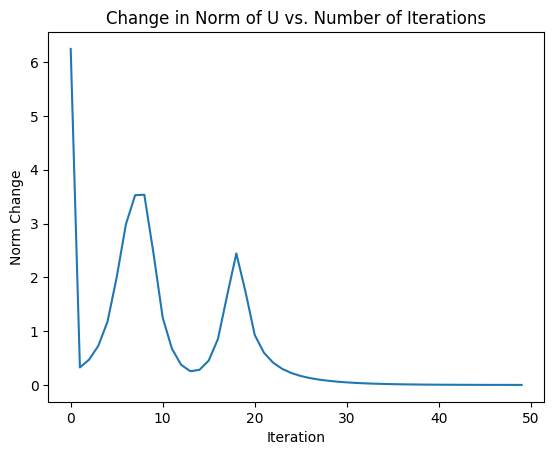

Final Membership Matrix U:
[[0.16817878 0.1761026  0.1761536  0.16121672 0.17603718 0.14231112]
 [0.45658022 0.10339901 0.10343964 0.15840997 0.10334678 0.07482438]
 [0.15860609 0.02264731 0.02266834 0.73633013 0.02262026 0.03712787]
 ...
 [0.1588222  0.17459598 0.17464298 0.16324895 0.17453564 0.15415425]
 [0.01688092 0.00421721 0.00422116 0.96117105 0.00421213 0.00929753]
 [0.02368438 0.01010397 0.01011315 0.90791341 0.01009215 0.03809295]]
Final Cluster Centers:
[[0.28967378 0.00374509 0.00354814 0.00366682 0.0038188  0.00325063
  0.00400794 0.0018287  0.00439073 0.00383103 0.00473494]
 [0.48851047 0.09804389 0.10232484 0.10240833 0.10209238 0.09540442
  0.11461343 0.03952168 0.11343246 0.10923518 0.20715621]
 [0.48848774 0.09810492 0.10238732 0.10246017 0.10215959 0.09544649
  0.11469547 0.03953826 0.11350313 0.10930999 0.20659253]
 [0.49203896 0.00381674 0.00398675 0.00398945 0.0040074  0.00354573
  0.00419935 0.00197787 0.00427026 0.00405406 0.00516217]
 [0.48853945 0.09796579 0.

In [34]:
def fuzzyClustering(X, m1, m2, nclusters, maxiter = 50, tol = 10**(-5)):
    #TODO fill in the code
    N = X.shape[0]
    U = initMu(N, nclusters)
    
    # List to store the norm changes for plotting later
    norm_history = []
    
    # Main loop: Repeat until the change in U is below the tolerance or maxiter is reached
    for iteration in range(maxiter):
        # Step 2: Compute cluster centers
        centers = calculateCenters(X, U, m1)
        
        # Step 3: Update membership matrix U
        U_new = updateMu(X, centers, m2)
        
        # Compute the change in the norm of U
        norm_diff = np.linalg.norm(U_new - U)
        norm_history.append(norm_diff)
        
        # Check if the change is below the tolerance
        if norm_diff < tol:
            print(f"Convergence reached at iteration {iteration}")
            break
        
        # Update U
        U = U_new
    
    # Plot the norm change over iterations
    plt.plot(norm_history)
    plt.title("Change in Norm of U vs. Number of Iterations")
    plt.xlabel("Iteration")
    plt.ylabel("Norm Change")
    plt.show()

    return U, centers

U_final, centers_final = fuzzyClustering(X, 2, 2, 6)

# Display the final membership matrix and centers
print(f"Final Membership Matrix U:\n{U_final}")
print(f"Final Cluster Centers:\n{centers_final}")


**Q6.** Run the fuzzyClasssification algorithm with different hyperparameters $m_1, m_2, \textrm{nclusters}$, note the plot of $U$-norm difference against the number of iterations. <font color='blue'>What can you say about it?</font>

Now lets use the fuzzy membership to find some crisp cluster labelling $\textrm{yfuzzy}$ to for each data point. For a given datapoint you'll assign the cluster labelling by looking at which cluster assigns the largest membership value. numpy.argmax function would be useful in this case. Again avoid for loops. 

Convergence reached at iteration 44


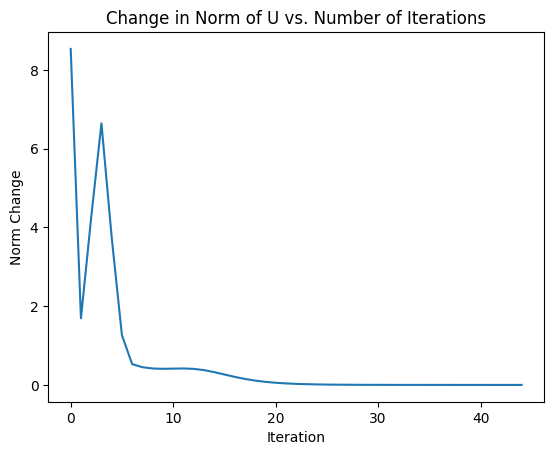

Convergence reached at iteration 49


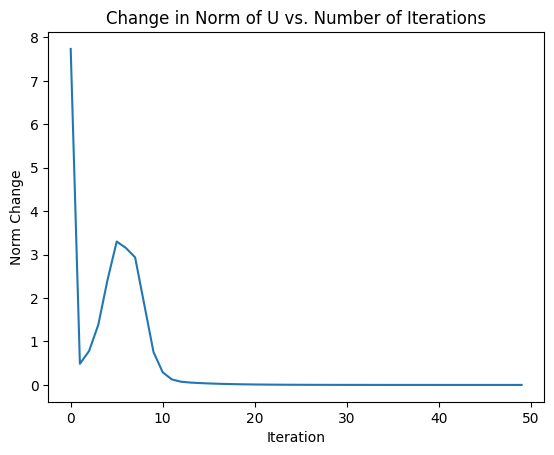

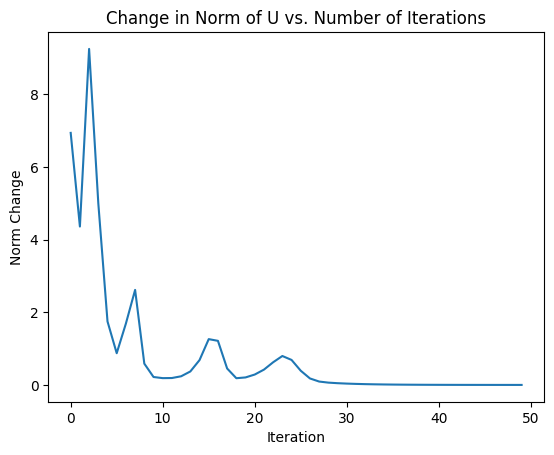

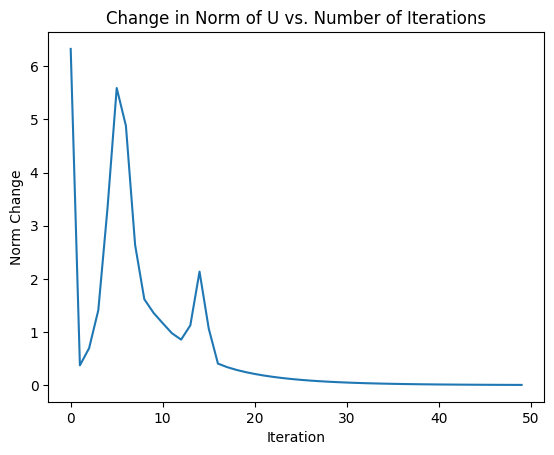

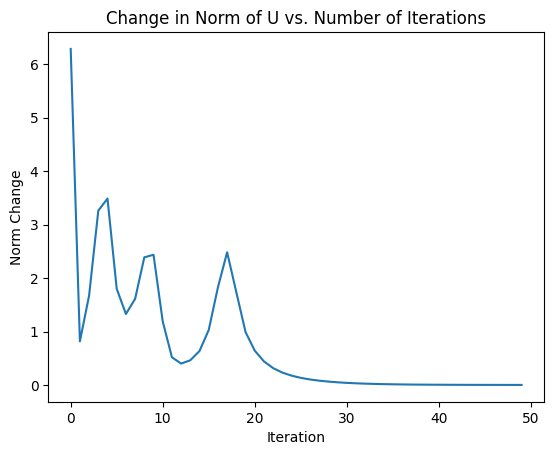

Crisp Cluster Labels:
[1 3 2 3 5 1 3 5 0 3 5 3 3 5 3 2 3 3 2 3 2 3 1 2 3 3 5 3 2 3 3 3 5 2 1 2 3
 3 5 0 2 3 1 3 3 3 0 3 2 3 5 3 2 3 2 3 0 2 3 1 2 2 3 2 3 1 3 2 2 3 1 2 2 2
 0 3 2 1 2 3 5 2 1 3 2 2 3 1 3 1 3 2 2 3 1 2 2 1 0 3 2 3 3 3 0 5 2 3 3 2 3
 2 3 0 2 3 3 2 2 5 2 3 2 3 0 2 3 5 2 3 2 2 3 2 3 2 2 3 2 3 0 5 3 3 2 2 5 2
 3 2 3 0 2 1 3 5 3 2 2 3 2 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 2 3 3 3 1 3 3 3 1 2 5 3 3 3 1 3
 3 3 2 2 3 3 3 3 3 3 3 2 1 2 1 3 3 3 3 3 3 1 1 2 3 1 1 1 2 1 3 3 1 2 5 3 2
 1 3 3 2 1 2 2 3 1 1 2 3 1 1 1 3 1 3 1 2 2 3 1 1 2 3 1 1 1 3 1 3 1 2 2 3 1
 3 1 3 3 1 3 2 3 1 3 2 3 1 1 3 3 2 1 1 1 2 3 3 3 3 3 1 3 2 3 1 3 2 3 1 1 0
 3 2 0 3 2 0 0 2 3 2 3 0 0 2 0 3 1 2 0 2 3 2 0 0 2 0 3 1 5 3 2 0 2 0 1 0 3
 1 3 1 0 1 0 2 3 2 0 3 1 0 3 0 0 1 0 2 3 2 3 1 0 1 0 2 3 2 0 3 1 0 3 0 0 1
 0 2 3 3 2 0 0 2 2 1 3 2 0 3 3 1 0 1 1 0 3 0 0 1 2 0 3 1 0 3 0 2 1 2 2 1 2
 3 1 1 0 2 0 0 3 1 1 1 2 3 2 3 0 0 3 2 2 2 1 3 1 3 0 0 0 1 1 1 0 3 1 2 0 0
 1 

In [29]:
#TODO fill in the code
hyperparams = [
    (1.5, 1.5, 3),
    (2.0, 2.0, 4),
    (2.0, 1.5, 5),
    (2.5, 2.0, 6),
    (2.0, 2.0, 6)
]

# Run the fuzzyClustering with different hyperparameters and observe the plot
for params in hyperparams:
    U_final, centers_final = fuzzyClustering(X, *params)

### Part 2: Finding Crisp Cluster Labels
# Now that we have the final U matrix, let's find the crisp labels using numpy.argmax()

# Assign crisp cluster labels to each data point based on maximum membership
yfuzzy = np.argmax(U_final, axis=1)

# Display the crisp cluster labels
print(f"Crisp Cluster Labels:\n{yfuzzy}")

Greater values of m1 and m2 result in a slower rate of convergence because the norm difference between iterations gets smaller over time.

Faster convergence is frequently achieved with lower values of nclusters, but the cluster assignments may be less precise.

**Q7.** The Silhoutte score is a measure of how well the clustering has been done, the closer the score to $1.0$ the better the clustering. Refer to sklearn.metrics.silhouette_score. Determine the best choice of hyperparameters $m_1, m_2, \textrm{nclusters}$ through a grid search based on the silhoutte score as the evaluation metric. <font color='blue'>Report the best combination of hyperparameters.</font> For the grid search try $m_1 = 1.0, 1.2, \cdots, 3.0$, $m_2 = 1.2, 1.4, \cdots, 3.0$, $\textrm{nclusters} = 2, 3, \cdots, 15$.

In [1]:
#TODO fill in the code

# from sklearn.metrics import silhouette_score

# def evaluate_fuzzy_clustering(X, m1, m2, nclusters):
#     # Run the fuzzy clustering algorithm
#     U_final, centers_final = fuzzyClustering(X, m1, m2, nclusters, maxiter=50, tol=10**(-5))
    
#     # Get the crisp cluster labels
#     yfuzzy = np.argmax(U_final, axis=1)
    
#     # Compute silhouette score
#     if len(np.unique(yfuzzy)) > 1:  # Silhouette score requires at least 2 clusters
#         score = silhouette_score(X, yfuzzy)
#     else:
#         score = -1  # Invalid score for cases where all points are assigned to the same cluster
    
#     return score

# # Define the range for m1, m2, and nclusters
# m1_values = np.arange(1.0, 3.1, 0.2)
# m2_values = np.arange(1.2, 3.1, 0.2)
# nclusters_values = np.arange(2, 16)

# # Variables to store the best score and corresponding hyperparameters
# best_score = -1
# best_params = (None, None, None)

# # Grid search over all combinations of m1, m2, and nclusters
# for m1 in m1_values:
#     for m2 in m2_values:
#         for nclusters in nclusters_values:
#             print(f"Evaluating for m1={m1}, m2={m2}, nclusters={nclusters}")
#             score = evaluate_fuzzy_clustering(X, m1, m2, nclusters)
#             print(f"Silhouette score: {score}")
            
#             # Track the best score and hyperparameters
#             if score > best_score:
#                 best_score = score
#                 best_params = (m1, m2, nclusters)

# # Report the best combination of hyperparameters
# print(f"Best Silhouette Score: {best_score}")
# print(f"Best Hyperparameters: m1={best_params[0]}, m2={best_params[1]}, nclusters={best_params[2]}")


Best Silhouette Score: 0.603714568316358
Best Hyperparameters: m1=1.5999999999999999, m2=1.4, nclusters=15

**Q8.** For the best combination of hyperparameters run the following visualization function with different values for $0 \leq f_1 < f_2 < \textrm{nclusters}$. <font color='blue'>What do you see? Explain the purpose of the code and what you would expect through this?</font>

In [35]:
def visualizeClusters2D(X, y, f1, f2):
    colorlist = ['black', 'gray', 'red', 'sienna', 'green', 'blue', 'gold', 'darkorange', 'olive', 'lavendar', 'salmon', 'teal', 'pink', 'magenta', 'tan', 'wheat']

    for i in range(8):
        plt.scatter(X[yfuzzy == i, f1], X[yfuzzy == i, f2], color = colorlist[i])

    plt.show()


Convergence reached at iteration 46


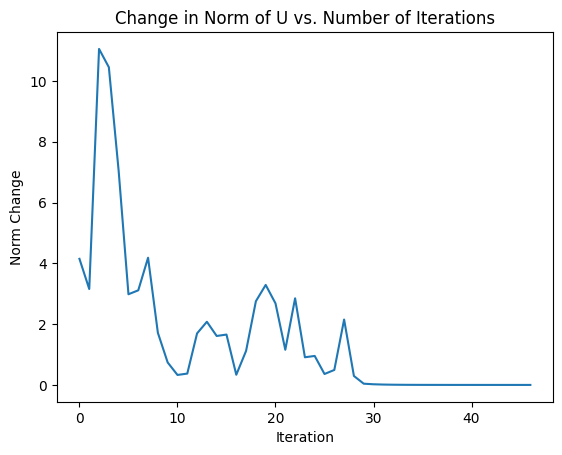

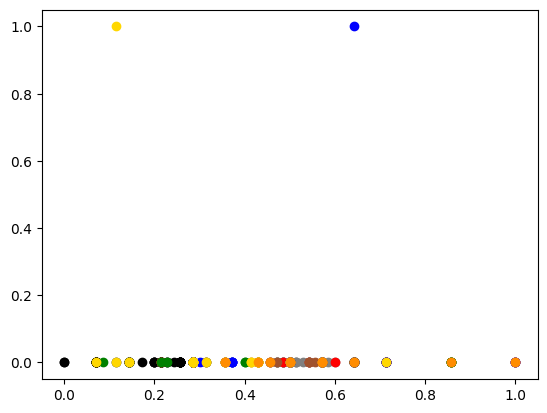

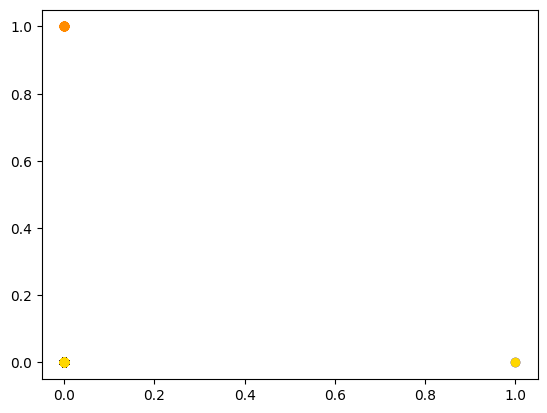

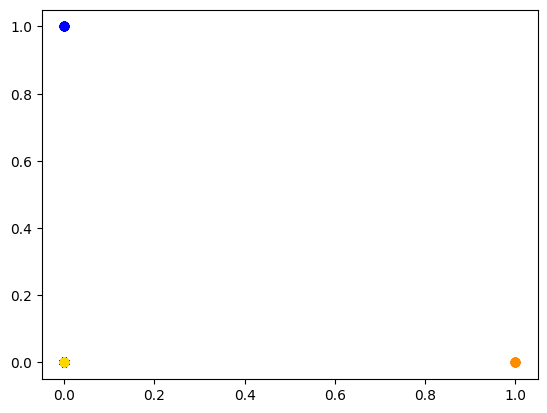

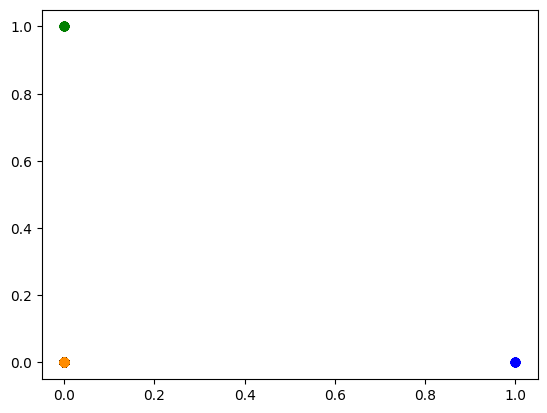

In [40]:
m1 = 1.6
m2 =1.4
nclusters = 15
U, centers_final = fuzzyClustering(X, m1, m2, nclusters)
yfuzzy = np.argmax(U, axis=1)

# Try different combinations of features
feature_combinations = [(0, 1),(1, 2), (2, 3),  (3, 4)]  

for f1, f2 in feature_combinations:
    visualizeClusters2D(X, yfuzzy, f1, f2)

The visualizeClusters2D function is designed to create a 2D scatter plot of clustered data, focusing on two selected features (f1 and f2). By coloring the points according to their cluster assignments, the function allows users to visually assess how well-separated the clusters are in the 2D feature space. This visualization helps in understanding the influence of different feature pairs on the clustering results. Clearly separated clusters in the plot suggest effective clustering, while overlapping clusters may indicate ambiguity or weak separation between the clusters. Additionally, by changing the features being plotted, one can identify which feature combinations are most relevant for distinguishing between clusters.

**Q9.** Load (to a pandas dataframe) the actual dataset (SMData.csv) from which the previous dataset was cleaned out. Match each entry in this dataset with the labels you found out through clustering using the best combination of hyperparameters. Go through a few of those clustered entries and notice any patterns (or common sentiment) in the text (the "Text" column of this dataset) of each entry within clusters vs outside the clusters. The label of the $i$th entry in the dataset $= \textrm{yfuzzy}[i]$. <font color='blue'>Explain any observations. Based on your observations, is the clustering successful?</font>

In [37]:
#TODO fill in the code
file_path_2 = 'SMData.csv'
df = pd.read_csv(file_path_2) #load data to pandas dataframe

# Add cluster labels to the DataFrame
df['Cluster'] = yfuzzy

# Analyze the text in each cluster
for cluster_num in range(nclusters):
    cluster_texts = df[df['Cluster'] == cluster_num]['Text']
    print(f"Cluster {cluster_num} texts:")
    print(cluster_texts.head())  # Print the first few entries of the cluster
    print("\n")

# To find out the label of a specific entry (e.g., the 10th entry)
entry_index = 9  
entry_label = df.iloc[entry_index]['Cluster']
entry_text = df.iloc[entry_index]['Text']

print(f"The label of the {entry_index + 1}th entry is: {entry_label}")
print(f"Text of the {entry_index + 1}th entry: {entry_text}")

Cluster 0 texts:
0      Enjoying a beautiful day at the park!        ...
22     Productive day ticking off my to-do list.    ...
34     Winter sports day at the local park.         ...
42     Feeling accomplished after a productive day. ...
59     An amusing incident brightened up my day!    ...
Name: Text, dtype: object


Cluster 1 texts:
335    Thrilled to witness the grandeur of a cultural...
339    Reflecting on life's journey, grateful for the...
345    Motivated to achieve fitness goals after an in...
347    Feeling empowered after conquering a challengi...
355    Anticipation for an upcoming adventure in an e...
Name: Text, dtype: object


Cluster 2 texts:
2      Just finished an amazing workout! 💪          ...
15     Reflecting on the past and looking ahead.    ...
23     Just finished a challenging workout routine. ...
48     Cooking a special dinner for loved ones.     ...
52     Can't believe the injustice happening in our ...
Name: Text, dtype: object


Cluster 3 texts:
77 